# Offline Section: Quiz 3 - Problem 2

## Linear Programming Model Formulation

Given the problem statement and your added note, it seems this problem most resembles a combination of the **Multi-Commodity Flow Problem** and the **Shortest Path Problem**:

- `Multi-Commodity Flow Problem:` This problem involves multiple commodities (two shipments in this case) being transported across the network. Each shipment is treated separately, having its own supply and demand nodes, but they share the network's capacity constraints. The objective is to optimize the flow of these commodities within the network given the constraints.

- `Shortest Path Problem:` Each shipment's objective is to travel from its origin to its destination traversing the shortest path possible. This objective is embedded within the multi-commodity flow problem as part of the cost minimization, where the cost is directly proportional to the distance travelled.

A **Multi-Commodity Shortest Path Problem** is therefore likely the best categorization for this problem, where we want to find the shortest paths for multiple commodities while considering the capacity constraints of the network.

![My Image](P2_Network_Completed.png)

*Let us denote:*

$N$ as the set of nodes in the network.

$A$ as the set of arcs in the network.

$K$ as the set of shipments $[S1, S2]$.

$b_{i}^{(k)}$ as the supply of shipment $k$ at node $i \in N$. Positive for supply nodes, negative for demand nodes, and zero for transshipment nodes.

$c_{ij}$ as the distance from node $i$ to node $j$, for $(i, j) \in A$.

$x_{ij}^{(k)}$ as the decision variable representing the flow of shipment $k$ from node $i$ to node $j$, for $(i, j) \in A$ and $k \in K$.

$u_{ij}$ as the capacity of the arc from node $i$ to node $j$, for $(i, j) \in A$.

**Objective Function:**

Minimize the total distance that the `shipments` have to go thru:

$$\min \sum_{(i, j) \in A} c_{ij} \cdot \sum_{k \in K} x_{ij}^{(k)}$$

**Constraints:**

1. `Flow Conservation Constraint:` 

$$\sum_{j:(i,j) \in A} x_{ij}^{(k)} - \sum_{j:(j,i) \in A} x_{ji}^{(k)} = b_{i}^{(k)}, \quad \forall i \in N, \quad \forall k \in K $$

2. `Capacity Constraint:` The total flow of all commodities on each arc should not exceed its capacity:

$$\sum_{k \in K} x_{ij}^{(k)} \leq u_{ij}, \quad \forall (i,j) \in A $$

3. `Non-Negativity Constraint:` For each arc $(i, j) \in A$ and commodity $k \in K$, the flow of goods should be non-negative:

$$x_{ij}^{(k)} \ge 0, \quad \forall (i,j) \in A, \quad \forall k \in K $$

## Python Implementation

In [1]:
#Getting the needed data
import csv
f = open("quiz 3 problem 2.csv")
csvfile = csv.DictReader(f, delimiter=',')
headers = csvfile.fieldnames

table = []
for row in csvfile:
    table.append(row)
    
f.close()

# Create set of Nodes.
#Nodes = set()
Nodes = range(1,14) #Decided to manually input this value and now the node "P" is node 13

# Create dictionary "Distance" for each arc.
# We can borrow the keys from this dictionary to define the arc set of the network.
Distance = {}
for row in table:
    fromNode = int(row['From'])
    toNode = int(row['To'])
    Distance[(fromNode,toNode)] = float(row['Distance (miles)'])
    #Nodes.add(fromNode)
    #Nodes.add(toNode)

Arcs_keys = Distance.keys()

# Convert float to integers for Arcs
Arcs = {(int(i), int(j)) for i, j in Distance.keys()}

In [2]:
#Define capacity of each arc
tunnel_brige = {(5, 8), (6, 9), (7, 10)}
Capacity = {key: 1 if key in tunnel_brige else 100 for key in Arcs}

In [3]:
Shipments = {'S1', 'S2'}
Origin = { 'S1' : 1, 'S2' : 2} #This can go the other way around as well
Destination = { 'S1' : 13, 'S2' : 13} #For practicity destination "P" was changed to Node 13
Volume = { 'S1' : 1, 'S2' : 1}

Supply = {}
for i in Nodes:
    for k in Shipments:
        if i==Origin[k]:
            Supply[i,k] = -Volume[k]
        elif i==Destination[k]:
            Supply[i,k] = Volume[k]
        else:
            Supply[i,k] = 0

In [4]:
# define a set of arc/commodity pairs (useful for variables)
ArcCommodities = {(i, j, k) for (i, j) in Arcs for k in Shipments}

In [5]:
Nodes

range(1, 14)

In [6]:
Distance

{(1, 3): 80.0,
 (2, 4): 68.0,
 (3, 4): 54.0,
 (3, 5): 94.0,
 (3, 6): 91.0,
 (4, 3): 51.0,
 (4, 6): 57.0,
 (4, 7): 116.0,
 (5, 8): 17.0,
 (6, 9): 15.0,
 (7, 10): 13.0,
 (8, 11): 71.0,
 (8, 12): 139.0,
 (9, 11): 92.0,
 (9, 12): 74.0,
 (10, 12): 83.0,
 (11, 13): 62.0,
 (12, 13): 47.0}

In [7]:
Arcs

{(1, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 3),
 (4, 6),
 (4, 7),
 (5, 8),
 (6, 9),
 (7, 10),
 (8, 11),
 (8, 12),
 (9, 11),
 (9, 12),
 (10, 12),
 (11, 13),
 (12, 13)}

In [8]:
Capacity

{(2, 4): 100,
 (3, 4): 100,
 (4, 3): 100,
 (5, 8): 1,
 (6, 9): 1,
 (7, 10): 1,
 (4, 6): 100,
 (9, 12): 100,
 (11, 13): 100,
 (12, 13): 100,
 (8, 12): 100,
 (10, 12): 100,
 (3, 6): 100,
 (8, 11): 100,
 (9, 11): 100,
 (1, 3): 100,
 (4, 7): 100,
 (3, 5): 100}

In [9]:
Supply

{(1, 'S1'): -1,
 (1, 'S2'): 0,
 (2, 'S1'): 0,
 (2, 'S2'): -1,
 (3, 'S1'): 0,
 (3, 'S2'): 0,
 (4, 'S1'): 0,
 (4, 'S2'): 0,
 (5, 'S1'): 0,
 (5, 'S2'): 0,
 (6, 'S1'): 0,
 (6, 'S2'): 0,
 (7, 'S1'): 0,
 (7, 'S2'): 0,
 (8, 'S1'): 0,
 (8, 'S2'): 0,
 (9, 'S1'): 0,
 (9, 'S2'): 0,
 (10, 'S1'): 0,
 (10, 'S2'): 0,
 (11, 'S1'): 0,
 (11, 'S2'): 0,
 (12, 'S1'): 0,
 (12, 'S2'): 0,
 (13, 'S1'): 1,
 (13, 'S2'): 1}

In [10]:
ArcCommodities

{(1, 3, 'S1'),
 (1, 3, 'S2'),
 (2, 4, 'S1'),
 (2, 4, 'S2'),
 (3, 4, 'S1'),
 (3, 4, 'S2'),
 (3, 5, 'S1'),
 (3, 5, 'S2'),
 (3, 6, 'S1'),
 (3, 6, 'S2'),
 (4, 3, 'S1'),
 (4, 3, 'S2'),
 (4, 6, 'S1'),
 (4, 6, 'S2'),
 (4, 7, 'S1'),
 (4, 7, 'S2'),
 (5, 8, 'S1'),
 (5, 8, 'S2'),
 (6, 9, 'S1'),
 (6, 9, 'S2'),
 (7, 10, 'S1'),
 (7, 10, 'S2'),
 (8, 11, 'S1'),
 (8, 11, 'S2'),
 (8, 12, 'S1'),
 (8, 12, 'S2'),
 (9, 11, 'S1'),
 (9, 11, 'S2'),
 (9, 12, 'S1'),
 (9, 12, 'S2'),
 (10, 12, 'S1'),
 (10, 12, 'S2'),
 (11, 13, 'S1'),
 (11, 13, 'S2'),
 (12, 13, 'S1'),
 (12, 13, 'S2')}

In [11]:
#Libraries
from docplex.mp.model import Model

In [12]:
#Instance of the model
mdl = Model()

In [13]:
#Decision variables
flow = mdl.continuous_var_dict(ArcCommodities, lb=0, name='flow')

In [14]:
#Flow balance constraints for each commodity and for each node
for k in Shipments:
    for j in Nodes:
        inflow = sum(flow[i,j,k] for i in Nodes if (i,j) in Arcs)
        outflow = sum(flow[j,i,k] for i in Nodes if (j,i) in Arcs)
        mdl.add_constraint(inflow - outflow == Supply[j,k])

In [15]:
#Define arc capacity constraints (over all commodities)
for (i,j) in Arcs:
    mdl.add_constraint(mdl.sum(flow[i,j,k] for k in Shipments) <= Capacity[i,j])

In [16]:
#KPIs
for k in Shipments:
    mdl.add_kpi(mdl.sum(Distance[i,j] * flow[i,j,k] for (i,j) in Arcs if (i,j,k) in ArcCommodities), f"Total distance for {k}")

mdl.add_kpi(mdl.sum(Distance[i,j] * mdl.sum(flow[i,j,k] for k in Shipments) for (i,j) in Arcs), "Total distance for all shipments")

DecisionKPI(name=Total distance for all shipments,expr=68flow_2_4_S1+71flow_8_11_S2+51flow_4_3_S1+68flow_2_4_S2+51flow_..)

In [17]:
#Solve
mdl.solve()
mdl.get_solve_details()

docplex.mp.SolveDetails(time=0,status='optimal')

In [18]:
#Solution
mdl.print_solution()

status: OPTIMAL_SOLUTION(2)
flow_2_4_S2=1.000
flow_11_13_S1=1.000
flow_6_9_S1=1.000
flow_1_3_S1=1.000
flow_4_7_S2=1.000
flow_10_12_S2=1.000
flow_4_6_S1=1.000
flow_3_4_S1=1.000
flow_12_13_S2=1.000
flow_7_10_S2=1.000
flow_9_11_S1=1.000


In [21]:
#Print the KPIs
mdl.report_kpis()

*  KPI: Total distance for S1            = 360.000
*  KPI: Total distance for S2            = 327.000
*  KPI: Total distance for all shipments = 687.000


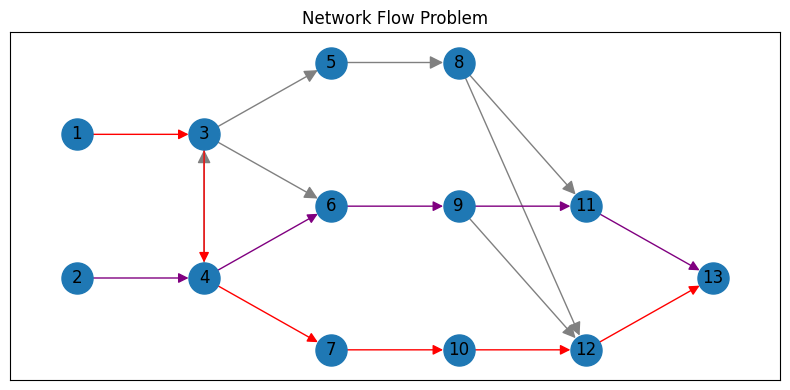

In [20]:
#Plot for solution:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes and their supply/demand
nodes = [str(i) for i in Nodes]

# Define the arcs (i, j), and their capacities
arcs_capacity = { (str(i), str(j)): Capacity[(i,j)] for i, j in Arcs}

flows_shipment1 = {('1', '3'), ('3', '4'), ('4', '7'), ('7', '10'), ('10', '12'), ('12', '13')}
flows_shipment2 = {('2', '4'), ('4', '6'), ('6', '9'), ('9', '11'), ('11', '13')}

# Create the graph and add nodes and arcs
G = nx.DiGraph()
G.add_nodes_from(nodes)
for arc, cap in arcs_capacity.items():
    G.add_edge(arc[0], arc[1], capacity=cap)

# Add flow information to the edges for shipment 1 and shipment 2
for arc in flows_shipment1:
    G[arc[0]][arc[1]]['flow1'] = 1

for arc in flows_shipment2:
    G[arc[0]][arc[1]]['flow2'] = 1

# Position nodes in layers
pos = {'1': (0, 1), '2': (0, 0), '3': (1, 1), '4': (1, 0), 
       '5': (2, 1.5), '6': (2, 0.5), '7': (2, -0.5), '8': (3, 1.5),
       '9': (3, 0.5), '10': (3, -0.5), '11': (4, 0.5), '12': (4, -0.5), '13': (5, 0)}

# Draw the network
plt.figure(figsize=(8, 4))

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Edges with flow information
edges_flow1 = [(u, v) for u, v, d in G.edges(data=True) if d.get('flow1', 0) > 0]
edges_flow2 = [(u, v) for u, v, d in G.edges(data=True) if d.get('flow2', 0) > 0]
edges_no_flow = [(u, v) for u, v, d in G.edges(data=True) if d.get('flow1', 0) == 0 and d.get('flow2', 0) == 0]

nx.draw_networkx_edges(G, pos, edgelist=edges_no_flow, node_size=500, edge_color='gray', arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges_flow1, node_size=500, edge_color='red', arrowstyle='-|>', arrowsize=15)
nx.draw_networkx_edges(G, pos, edgelist=edges_flow2, node_size=500, edge_color='purple', arrowstyle='-|>', arrowsize=15)

# Node labels
nx.draw_networkx_labels(G, pos)

plt.title('Network Flow Problem')
plt.tight_layout()
plt.show()

# Quiz Section